In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [15]:
from globalVars import DATASET_DIRECTORY, IMAGE_SIZE, BATCH_SIZE, CHANNELS, EPOCHS, TRAINING_SIZE, SEED, SHUFFLE_SIZE

In [16]:
from helpers import split_data_set

In [17]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_DIRECTORY,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [18]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [19]:
len(dataset) # Number of batches

68

In [20]:
for image_batch, label_batch in dataset.take(5): # The images inside tha batch (32) and the label (0 or 1 or 2) from the batches from first batch to batch no.5
    print(image_batch.shape)
    print(f"{label_batch.numpy()}")

(32, 256, 256, 3)
[1 1 0 1 1 1 1 0 0 1 2 0 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1]
(32, 256, 256, 3)
[0 0 0 0 1 0 1 1 1 1 1 1 2 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0]
(32, 256, 256, 3)
[0 1 0 1 0 1 0 1 1 0 1 0 1 1 2 0 0 2 0 0 2 0 0 0 1 1 1 2 1 1 1 0]
(32, 256, 256, 3)
[0 1 1 0 1 0 2 1 1 0 1 2 1 1 0 0 2 0 0 1 0 1 2 0 0 1 1 1 1 0 1 1]
(32, 256, 256, 3)
[1 1 1 0 1 1 1 1 1 0 1 1 1 2 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 2 0 1]


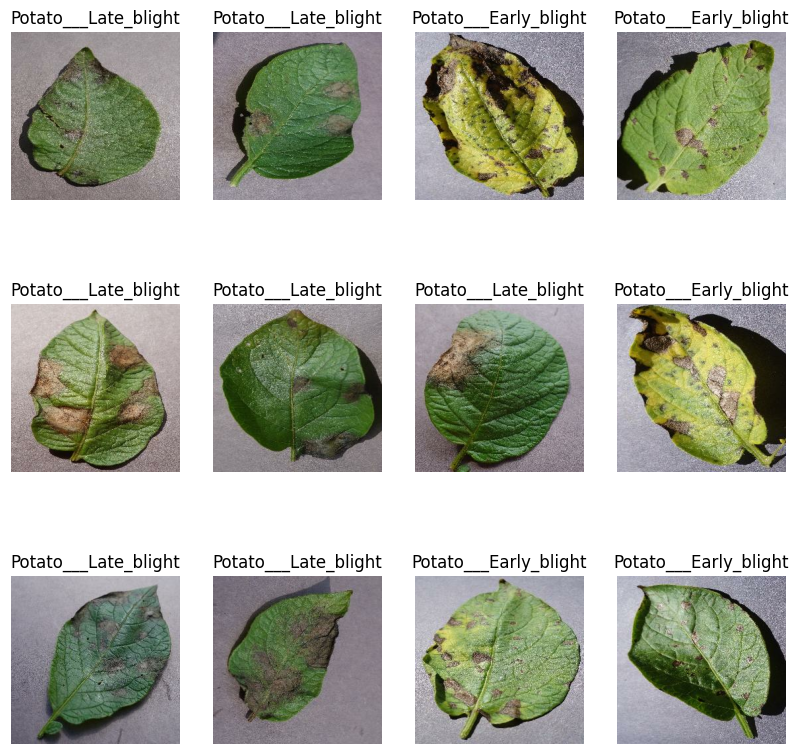

In [21]:
plt.figure(figsize=(10, 10))

for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i+1) # number of rows, number of columns, the position of the image
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

<h1>Split data</h1>
<h4 style="margin-bottom: 8px;">we will split the dataset to:</h4>
<p style="margin: 0;">80% ==> training</p>
<p style="margin: 0;">20% ==> 10% validation, 10% test</p>

In [22]:
training_ds, validation_ds, testing_ds = split_data_set(dataset, TRAINING_SIZE, 0.1, True, SHUFFLE_SIZE, SEED)

In [23]:
len(training_ds)

54

In [24]:
len(validation_ds)

6

In [25]:
len(testing_ds)

8

In [26]:
training_ds = training_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
testing_ds = testing_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

<h1>Pre-processing</h1>

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE), # change the dimensions to IMAGE_SIZE * IMAGE_SIZE
    layers.experimental.preprocessing.Rescaling(1.0/255) # change the value of the pixel color to be between [0, 1]
])

<h1>Data Augmentation</h1>

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"), 
    layers.experimental.preprocessing.RandomRotation(0.2) 
])

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'